<a href="https://colab.research.google.com/github/eovallemagallanes/Digital-Image-Processing/blob/main/Gabor_Bank_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gabor Filter

Gabor filter is a linear filter used in image processing for many applications, such as edge detection, texture analysis, feature extraction, etc. From these image measures or features, an image classification task can be solved.

These filters can approximate certain cells' characteristics in some mammals' visual cortex, e.g., frequency and orientation representations of the Gabor filter are similar to those of the human visual system.

Gabor filters are a special class of bandpass filters, i.e., they allow a certain *band* of frequencies and reject the others. 
A 2D Gabor function consists of a sinusoidal plane wave of some frequency and orientation, modulated by a 2D Gaussian envelope, typically in the spatial domain:

$$
G(x, y) = K \cdot exp \left( -\frac{1}{2} \left[ \frac{x^2}{\sigma_x^2} + \frac{y^2}{\sigma_y^2} \right] \right) \cdot exp \left( j \left( 2\pi Wx + \phi \right) \right), \quad K = \frac{1}{2\pi \sigma_x \sigma_y},
$$
where $W$ and $\phi$ are the frequency and phase of the sinusoid along the $x$-axis, and $\sigma_x$ and $\sigma_y$ are the width of the Gaussian envelope  function.

Notice that the last term of the can be written as:
$$
exp \left( j \left( 2\pi Wx + \phi \right) \right)= \cos(2\pi Wx) + i \sin(2\pi Wx).
$$

A Gabor filter with arbitrary orientation $\theta$ can be obtained by rotating the coordinate system, such as
$$
x = x cos(\theta) + y sin(\theta), \\
y = -y sin(\theta) + y cos(\theta).
$$

One such 2D Gabor filter with $\sigma_x = \sigma_y = 20$, $\theta=45^{\circ}$, $W=0.03$, and $\phi=0$ is shown in the Figure 1.


![picture](https://drive.google.com/uc?id=1O8the7V9Sby_xqnj9jLYtIgoNvE4Aybt)
**Figure 1: A 2D Gabor filter (real part only) obtained by modulating the sine wave with a Gaussian** 

## Parameters Analysis

* $W$: The modulation frequency governs the width of the strips of the Gabor filter. Increasing the frequency produces thinner stripes, and decreasing it produces thicker stripes, as illustrated in Figure 2.

![picture](https://drive.google.com/uc?id=1HHQKbuuHIqoGHjXzsgykXyTeTqxpSaNn)
**Figure 2: Modulation frequency effect in a 2D Gabor filter. $W = (0.01, 0.02, 0.03)$ from left to rigth. $\sigma_x = \sigma_y = 20, \theta=0^{\circ}, \phi=0$.**

* $\theta$: The theta controls the orientation of the Gabor filter. The zero degrees corresponds to the vertical position of the Gabor filter. An example is shown in Figure 3.

![picture](https://drive.google.com/uc?id=1KU8ae-IKdDjFEbxUM_iUOwO1xwxjvaPo)
**Figure 3: Rotation effect in a 2D Gabor filter. $\theta=(0^{\circ}, 45^{\circ}, 90^{\circ}) $ from left to rigth. $W=0.03, \sigma_x = \sigma_y = 20, \phi=0$.**

* $\sigma$: Sigma or the bandwidth controls the overall size of the Gabor envelope. For larger $\sigma$, the envelope increase. Thus, the number of stripes in the Gabor function increases on increasing the sigma, see Figure 4.

![picture](https://drive.google.com/uc?id=1bJoKEOyihqHw6COulQkdcTdPcN8PnDmL)
**Figure 4: Bandwidth effect in a 2D Gabor filter. $\sigma_x=\sigma_y=(10, 20, 40) $ from left to rigth. $W=0.03, \theta=0^{\circ}, \phi=0$.**

## Filter bank

To analyze texture or obtain features from an image, a Gabor filter bank with a number of different orientations is used. In this work, 72 filters were used, varying $\sigma, W, \theta$ as follows:

* $\sigma = (3, 5, 10)$
* $W = (0.01, 0.02, 0.03)$
* $\theta = (0, \frac{\pi}{8}, \frac{2 \pi}{8}, \cdots , 180)$

In such a way, once a $\sigma$ value was set, 24 kernels were made, changing their frequency and orientation. Figure 6 illustrates an example of a 2D Gabor filter bank.

![picture](https://drive.google.com/uc?id=1UlBRDXBCvNoiVfbp8JchMSSewWSaXhO8)
**Figure 6: 2D Gabor filter bank sample.**

For each filter in the Gabor bank, a feature map or activation map is obtained such as
$$
A_k = \sqrt{ (I*\mathbf{Re}(G_k))^2 + (I*\mathbf{Im}(G_k))^2}, \quad k=(1, 2, \cdots, 72)
$$
where $\mathbf{Re}, \mathbf{Im}$ are the real and imaginary part of the kernel, respectively, and $*$ is the 2D convolution operation.

Additionally, a pixel-wise maximum response is computed for each set of feature maps computed from the filters with the same $\sigma$ (a total of 24 filters). As such, this Maximum-feature map only keeps the filters high responses. Figure 7 shows an example of a single Gabor filter and a Maximum map.

![picture](https://drive.google.com/uc?id=1l_wOxSgZOF5-VSG39niFjLWiAeIqu-f_)
**Figure 7: Left to right: Input image, single 2D Gabor filter response and Max-filters response.**

In this manner, three additional feature maps are obtained. 

The main purpose of texture-based image classification is to assign a label from a given image. Therefore the mean $\mu_k$ and standard deviation $\sigma_k$ of each feature map $A_k$ of a certain bandwidth represent the texture information of an image. Thus
$$
\mu_k = \mathbb{E}[A_k], \\
\sigma_k = \mathbb{E}[(A_k - \mu_k) ^2],
$$
where $\mathbb{E}$ is the expected value.

A feature vector $\mathbf{f}_i \in \mathbb{R}^{50}$ is created using this components. This yield that for each bandwidth, the feature vector is given by
$$
\mathbf{f}_i = [\mu_1^i, \sigma_1^i, \cdots, \mu_{24}^i, \sigma_{24}^i, \mu_M^i, \sigma_M^i], \quad i = (1, 2, 3)
$$
where $\mu_M, \sigma_M$ are the mean and variance of the max-response activation map.

In this manner, a final feature vector $\mathbf{F} \in \mathbb{R}^{150}$ is obtained by concatenating each sub-feature vector, such as
$$
\mathbf{F} = [\mathbf{f}_1, \mathbf{f}_2, \mathbf{f}_3].
$$

Once the features for each class (images with a common texture) have been extracted, any classifier can be trained. In this case, a Linear Support Vector Machine (SVM) was selected.

## Classification results

Figure 8 shows an example of classification between brick, grass, and gravel textures. It can be seen that the gravel texture is miss-classified. 

So far, the same filter bank is applied for each texture; however, one possibility to improve the detection performance is to create a custom filter bank for each texture.

![picture](https://drive.google.com/uc?id=1DWYW4beHXjIvhAFKpxXeaaxc-VXN6mN0)
**Figure 8: Classification results**


# **Source code**

## **Include dependencies**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

## **Plotting and auxilar functions**

In [2]:
def surface_plot (matrix, **kwargs):
    # acquire the cartesian coordinate matrices from the matrix
    # x is cols, y is rows
    (x, y) = np.meshgrid(np.arange(matrix.shape[0]), np.arange(matrix.shape[1]))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, matrix, **kwargs)
    return (fig, ax, surf)


## **2D Gabor function**

In [3]:
def gabor2D(sigma_x, sigma_y, theta, frequency, offset, n_stds = 3):
    x0 = np.ceil(max(np.abs(n_stds * sigma_x * np.cos(theta)),
                     np.abs(n_stds * sigma_y * np.sin(theta)), 1))
    y0 = np.ceil(max(np.abs(n_stds * sigma_y * np.cos(theta)),
                     np.abs(n_stds * sigma_x * np.sin(theta)), 1))
    
    # ensure a square filter
    n = max(x0, y0) 
    y, x = np.mgrid[-n:n + 1, -n:n + 1]

    # rotate the coordinate system
    rotx = x * np.cos(theta) + y * np.sin(theta)
    roty = -x * np.sin(theta) + y * np.cos(theta)

    # gaussian filter
    g = np.zeros(y.shape, dtype=complex)
    g[:] = np.exp(-0.5 * (rotx ** 2 / sigma_x ** 2 + roty ** 2 / sigma_y ** 2))

    # scale factor
    K = 2 * np.pi * sigma_x * sigma_y
    g /= K

    # sin envelope
    z = np.exp(1j * (2 * np.pi * frequency * rotx + offset))
    g *= z

    # return gabor (and envelope)
    return g, z

## **Gabor components visualization**

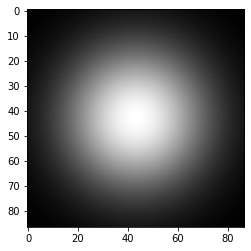

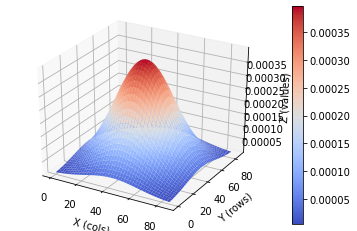

In [4]:
# 2d gaussian
G, _ = gabor2D(20, 20, math.radians(45), 0, 0)

#plot in 2d
plt.imshow(G.real, cmap='gray')
plt.show()

# plot in 3d
(fig, ax, surf) = surface_plot(G.real, cmap=plt.cm.coolwarm)
fig.colorbar(surf)
ax.set_xlabel('X (cols)')
ax.set_ylabel('Y (rows)')
ax.set_zlabel('Z (values)')
plt.show()

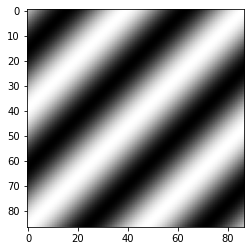

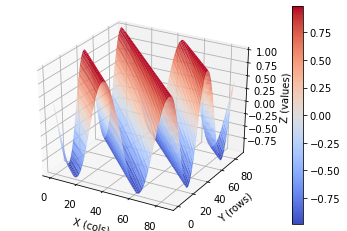

In [5]:
# plot imaginary part
_, z = gabor2D(20, 20, math.radians(45),0.03, 0 )

#plot in 2d
plt.imshow(z.real, cmap='gray')
plt.show()

#plot in 3d
(fig, ax, surf) = surface_plot(z.real, cmap=plt.cm.coolwarm)
fig.colorbar(surf)
ax.set_xlabel('X (cols)')
ax.set_ylabel('Y (rows)')
ax.set_zlabel('Z (values)')
plt.show()



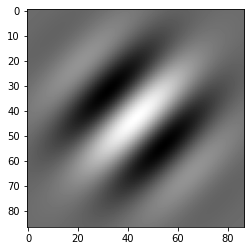

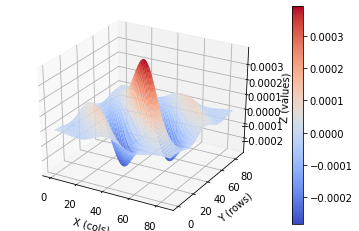

In [6]:
G_full = G*z
#plot in 2d
plt.imshow(G_full.real, cmap='gray')
plt.show()

#plot in 3d
(fig, ax, surf) = surface_plot(G_full.real, cmap=plt.cm.coolwarm)
fig.colorbar(surf)
ax.set_xlabel('X (cols)')
ax.set_ylabel('Y (rows)')
ax.set_zlabel('Z (values)')
plt.show()

## **Filter bank**

<Figure size 432x288 with 0 Axes>

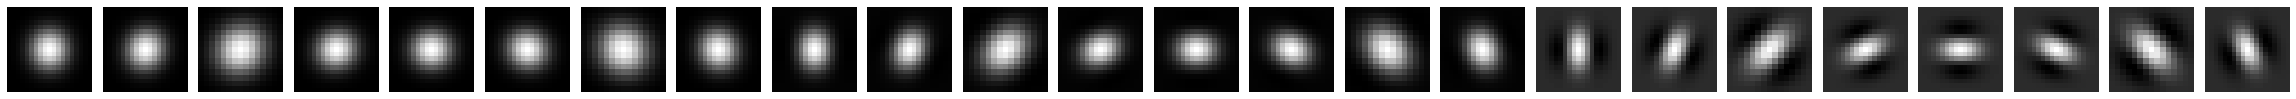

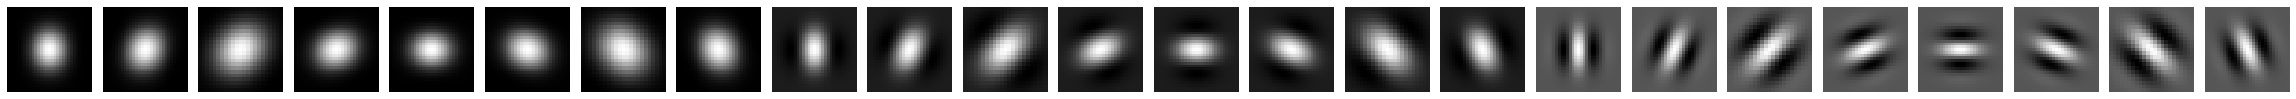

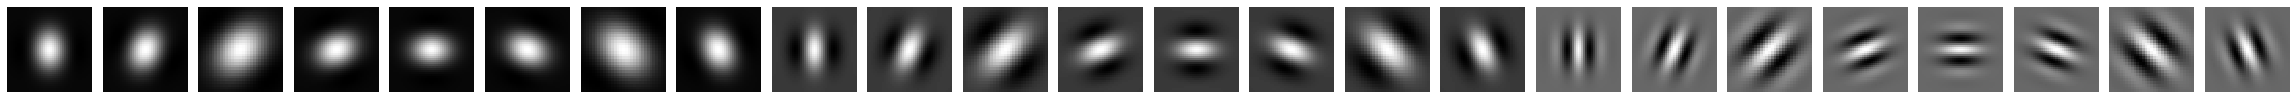

In [7]:
g_bank = []
n_filters = 8
thetas = np.arange(0, 180, 180/n_filters)
fig = plt.figure()


for s in([3, 5, 7]):
    idx = 0
    fig, axes = plt.subplots(ncols=24, figsize=(32, 16))
    ax = axes.ravel()
    for f in([0.02, 0.04, 0.08]):
        for theta in(thetas):
            theta = math.radians(theta)
            g, _= gabor2D(sigma_x=s, sigma_y=s, theta=theta, frequency=f, offset=0)
            g_bank.append(g)
            # 'RdBu' -> 'gray'
            ax[idx].imshow(g.real, 'gray', interpolation='none', )
                #vmin=-abs(g).max(), vmax=abs(g).max())
            ax[idx].axis('off')
            fig.tight_layout()
            idx = idx+1
    plt.show()

## **Load data**

In [8]:
from scipy import ndimage as ndi
from skimage import data
from skimage.util import img_as_float
from skimage.transform import rescale

# load images and downsampled
brick = img_as_float(data.brick())
grass = img_as_float(data.grass())
gravel = img_as_float(data.gravel())
image_names = ('brick', 'grass', 'gravel')

images = (brick, grass, gravel)
downsampled_images = [rescale(img, 0.5, anti_aliasing=False) for img in images]

## **Data Augmentation**

In [9]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0], 
                             rotation_range=180,
                             horizontal_flip=True,
                             fill_mode='constant',
                             cval=0)

X = []
Y = []
N = 15

for img, label in zip(downsampled_images, image_names):
    # prepare iterator
    data = img_to_array(img)*255
    samples = expand_dims(data, 0)
    aug_iter = datagen.flow(samples, batch_size=1)

    # generate samples
    xi = []
    yi = []
    for i in range(N):
        # generate batch of images
        batch = aug_iter.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        xi.append(image[..., 0]/255)
        yi.append(label)

    X.extend(xi)
    Y.extend(yi)

X = np.asarray(X)
Y = np.asarray(Y)

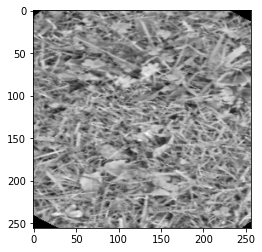

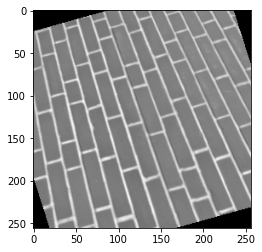

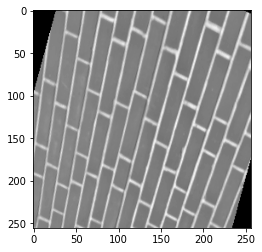

In [10]:
for i in range(3):
    plt.imshow(X[np.random.randint(0, len(X))], cmap='gray')
    plt.show()

## **Feature map and feature vector functions**

In [11]:
def compute_activations(image, kernels):
    h, w = image.shape
    out = np.zeros((len(kernels)+1, h, w))
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    
    for k, kernel in enumerate(kernels):
        filtered = np.sqrt(ndi.convolve(image, np.real(kernel), mode='wrap')**2 +
                   ndi.convolve(image, np.imag(kernel), mode='wrap')**2)
        out[k] = filtered.copy()

    max_res = np.amax(out, axis=0)
    out[-1] = max_res.copy()

    return out


def compute_feats(activations):
    feats = np.zeros((len(activations), 2), dtype=np.double)
    #max_res = np.amax(activations, axis=0)

    for k, act in enumerate(activations):
        feats[k, 0] = act.mean()
        feats[k, 1] = act.var()

    return feats


## **Training feature extraction**

In [12]:
from tqdm import tqdm 

n=24 # number of filters per sigma
data = [] 
for xi in tqdm(X):
    # get activations maps
    out = [compute_activations(xi, g_bank[i:i + n]) for i in range(0, len(g_bank), n)]

    # get feature vector
    feats = [compute_feats(act) for act in out]
    feats = np.asarray(feats)
    feats = feats.flatten()

    # save feature vector in data array
    data.append(feats)

100%|██████████| 60/60 [15:38<00:00, 15.65s/it]


## **Train classifier**

In [13]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


# train a Linear SVM on the data
#model = LinearSVC(C=1.0, random_state=42, max_iter=1000)
model = SVC(C=1.0, gamma=2)
model.fit(data, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

## **Test classifier**

In [14]:
def match(data, feats):
    all_d = [np.linalg.norm(d - feats) for d in(data)]
    all_d = np.asarray(all_d)
    min_idx = np.argmin(all_d)

    return min_idx

Query image: brick


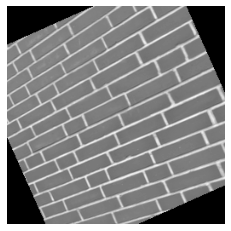

Prediction SVM:  gravel
Prediction L2-Distance:  gravel
Query image: grass


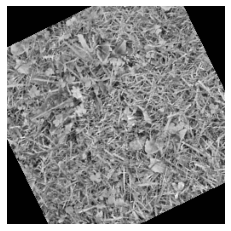

Prediction SVM:  gravel
Prediction L2-Distance:  grass
Query image: gravel


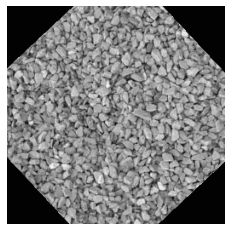

Prediction SVM:  gravel
Prediction L2-Distance:  grass


In [15]:
for img, label in zip(downsampled_images, image_names):
    th = np.random.randint(0,180)
    rot_img = ndi.rotate(img, angle=th, reshape=False)

    print('Query image:', label)
    plt.imshow(rot_img, cmap='gray')
    plt.axis('off')
    plt.show()

    # get activations maps
    out_q = [compute_activations(rot_img, g_bank[i:i + n]) for i in range(0, len(g_bank), n)]

    # get feature vector
    feats_q = [compute_feats(act) for act in out_q]
    feats_q = np.asarray(feats_q)
    feats_q = feats_q.flatten()

    prediction = model.predict(feats_q.reshape(1, -1))
    print('Prediction SVM: ', prediction[0])
    
    pred_idx = match(data, feats_q)
    print('Prediction L2-Distance: ', Y[pred_idx])

